## 네이버 영화 - 반도 리뷰 크롤링

In [107]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### 공감순 평점, 리뷰

- 네이버 영화 평점 페이지는 네트워크 탭에서 document를 통해 url 확인 가능함

In [2]:
movie_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185917&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='

In [4]:
# 1페이지 평점, 리뷰 긁어오기

page_num = str(1)

response = requests.get(movie_url + page_num)
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200629181825" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200629181825" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200629181825" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200629181825" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="185917"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

In [49]:
score_result = soup.find('div', {'class': 'score_result'})
lis = score_result.findAll('li') # score_result 안에 있는 여러 li 불러오기

In [60]:
review = []
score = []

# 각각의 li 에 들어가서 리뷰 텍스트와 점수 텍스트 긁어오기
for li in lis:
    rev = li.find('p').getText().replace('관람객','').replace('\t','').replace('\n','').replace('\r','') # 불필요한 문자 제거
    sco = li.find('em').getText()
    review.append(rev)
    score.append(sco)


['재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 감동은 빼주셨으면 ', '영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다 ', '아으  정말 시간 아깝다 부산행은 정말 명작 이었다글구 한국영화 제발 울고불고..휴좀 않넣으면 안되나? ', '진짜 재미없음 다른말필요없음 ', '실망대망.  교과서적 연출로도 평타 이상은 가능할 좀비소재를 이렇게까지... ', '한창 때리고 부수고 싸우는 거 좋아하는 10세 남아 머리에서 나올법한  수준 낮은 각본과 연출. 대신 추진력 하나는 인정. 이런 지지고 볶는 짜파게티같은 각본을 완결짓고 영화판에 내다니..그 점은 대단! 애기들도 연...', '분노의 질주를 본것 같았다...감동을 억지로 씬에 담으려는거 같았고현실성 없는 내용들이 많이 깔려있어서보는내내 이질감이 느껴져 2점 드렸습니다. ', '부산행의 반도 못하다 해서 반도. . 인가.. ', '기아 모하비 홍보영상을 보고나온 느낌이 제일 강하게 들었고,차량 액션신은 대부분 cg인데 이질감이 느껴짐좀비 연출은 죄다 때거지로 덤비는 연출 아쉬움그냥 볼만한 수준의 영화이 영화보다 부산행 한 번 더 보는걸 추천드...', '스포일러가 포함된 감상평입니다. 감상평 보기미안하지만 jane 명찰보고 빵터짐 ']
['6', '4', '2', '1', '1', '2', '5', '2', '6', '8']


In [61]:
movie = pd.DataFrame(data={'review':review, 'score':score})
movie.head()

,review,score
0,재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 ...,6
1,영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다,4
2,아으 정말 시간 아깝다 부산행은 정말 명작 이었다글구 한국영화 제발 울고불고..휴...,2
3,진짜 재미없음 다른말필요없음,1
4,실망대망. 교과서적 연출로도 평타 이상은 가능할 좀비소재를 이렇게까지...,1


## 함수로 만들어 정의하기

In [125]:
def movie_review(url, page_num):
    review = []
    score = []
    
    for i in range(1,page_num+1):
        response = requests.get(url + str(i))
        soup = BeautifulSoup(response.text, 'html.parser')
        score_result = soup.find('div', {'class': 'score_result'})
        lis = score_result.findAll('li')
        
        for li in lis:
            rev = li.find('p').getText().replace('관람객','').replace('\t','').replace('\n','').replace('\r','')
            sco = li.find('em').getText()
            review.append(rev)
            score.append(sco)
    
    movie = pd.DataFrame(data={'review':review, 'score':score})
    
    movie.to_csv('naver_movie.csv',encoding='euc-kr', index=False)

In [126]:
movie_review(movie_url,50)

In [114]:
review_df = pd.read_csv('naver_movie.csv',encoding='euc-kr')
review_df.head()

,review,score
0,재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 ...,6
1,영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다,4
2,아으 정말 시간 아깝다 부산행은 정말 명작 이었다글구 한국영화 제발 울고불고..휴...,2
3,진짜 재미없음 다른말필요없음,1
4,실망대망. 교과서적 연출로도 평타 이상은 가능할 좀비소재를 이렇게까지...,1


In [115]:
len(review_df)

500

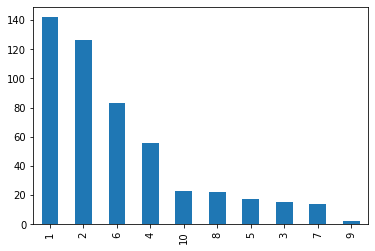

In [116]:
# 영화 <반도>의 공감순 상위 500개 평점 분포

review_df['score'].value_counts().plot.bar()

In [117]:
movie_review(movie_url,5)

In [120]:
review_df = pd.read_csv('naver_movie.csv',encoding='euc-kr')
len(review_df)

50

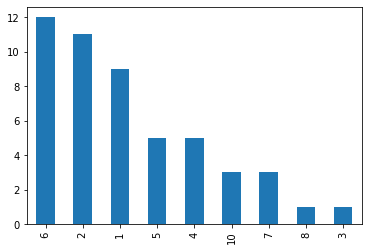

In [121]:
# 영화 <반도>의 공감순 상위 50개 평점 분포

review_df['score'].value_counts().plot.bar()

In [122]:
m2_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=189537&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='

In [127]:
movie_review(m2_url,5)

In [128]:
review_df = pd.read_csv('naver_movie.csv',encoding='euc-kr')
len(review_df)

50

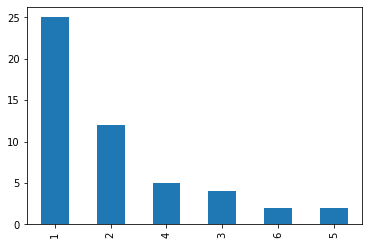

In [133]:
# 영화 <#살아있다>의 공감순 상위 50개 평점 분포

review_df['score'].value_counts().plot.bar()